In [22]:
import pickle
import matplotlib.pyplot as plt

In [21]:
objects_dict = {}
for i in range(1, 7):
    with (open(f"densenet_history/history_{i}.pickle", "rb")) as openfile:
        try:
            objects_dict[f"history_{i}"] =pickle.load(openfile)
        except EOFError:
            break

In [32]:
# Example dictionary holding the training and validation accuracy for each freezing strategy
history_for_freezing = {
    i: {'train_accuracy': objects_dict[f"history_{i}"].history['accuracy'], 'val_accuracy': objects_dict[f"history_{i}"].history['val_accuracy']}  
    for i in range(1, 7)
}




        



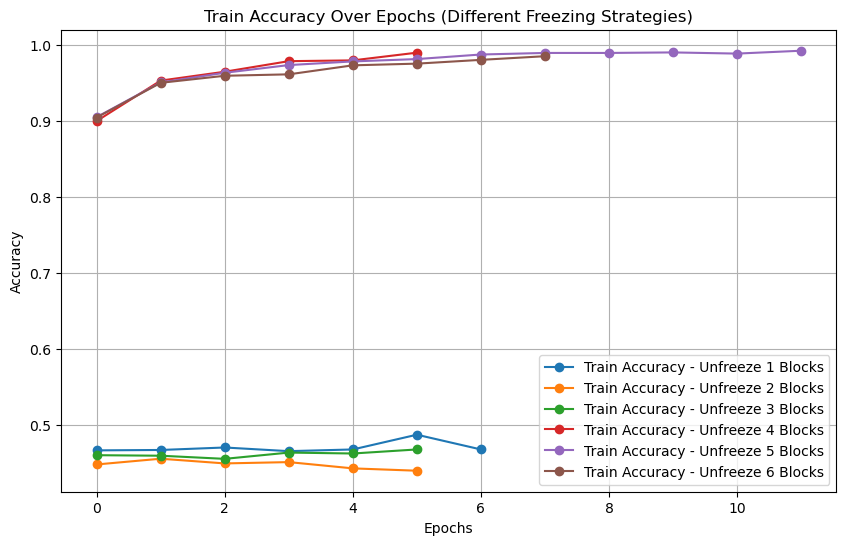

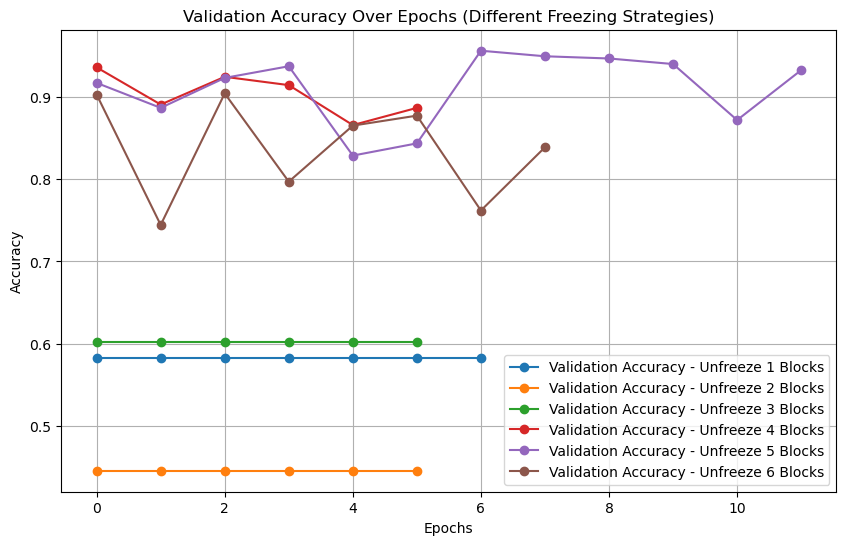

In [34]:
# Plot train accuracy for each freezing strategy
plt.figure(figsize=(10, 6))
for freezing in range(1, 7):
    plt.plot(history_for_freezing[freezing]['train_accuracy'], label=f'Train Accuracy - Unfreeze {freezing} Blocks', linestyle='-', marker='o')

plt.title('Train Accuracy Over Epochs (Different Freezing Strategies)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
# Plot validation accuracy for each freezing strategy
for freezing in range(1, 7):
    plt.plot(history_for_freezing[freezing]['val_accuracy'], label=f'Validation Accuracy - Unfreeze {freezing} Blocks', linestyle='-', marker='o')

# Add title and labels
plt.title('Validation Accuracy Over Epochs (Different Freezing Strategies)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Optional: Add a grid for better visibility
plt.grid(True)